# 9.4.2 GRU for Time Series

### Explanation of GRU (Gated Recurrent Unit) Networks for Time Series

Gated Recurrent Unit (GRU) networks are a type of Recurrent Neural Network (RNN) architecture designed to handle sequential data. They are similar to Long Short-Term Memory (LSTM) networks but are generally simpler and computationally more efficient. GRUs are equipped with gating mechanisms to control the flow of information, making them effective for learning long-term dependencies in time series data.

**Key Components:**
1. **Update Gate**: Controls how much of the past information needs to be passed along to the future. It determines the extent to which the previous state should be retained.
2. **Reset Gate**: Decides how much of the past information should be discarded. It helps in resetting the memory to a certain extent.
3. **Candidate Activation**: This is a new memory content that is created based on the reset gate and used to update the current state.

The GRU model is represented by its gates and the candidate activation, which combine to update the hidden state efficiently.

### Scenarios Where GRUs Are Beneficial in Time Series Forecasting

**Benefits of GRUs:**
- **Reduced Complexity**: GRUs have fewer parameters compared to LSTMs, which can lead to faster training times and reduced computational requirements.
- **Efficient Learning**: The gating mechanisms of GRUs can effectively capture long-term dependencies and temporal patterns in the data.
- **Handling Vanishing Gradient Problem**: GRUs, like LSTMs, are designed to handle the vanishing gradient problem, making them suitable for deep networks.

**Use Cases:**
- **Financial Forecasting**: GRUs can be used to predict stock prices, market trends, and other financial metrics.
- **Demand Forecasting**: They are useful for predicting product demand, sales forecasts, and inventory requirements.
- **Sensor Data Analysis**: GRUs can model time series data from sensors in industrial applications, such as machinery performance or environmental monitoring.
- **Natural Language Processing**: GRUs are used in tasks like sequence-to-sequence modeling and language modeling.

### Methods for Implementing GRU for Time Series

**Steps:**
1. **Data Preparation**: Prepare and preprocess the time series data, including normalization and splitting into training and testing sets.
2. **Model Design**: Construct the GRU network architecture using libraries like TensorFlow or Keras. Define the number of GRU units, layers, and other hyperparameters.
3. **Model Training**: Train the GRU model on the training data. Use techniques such as early stopping to avoid overfitting.
4. **Model Evaluation**: Evaluate the model performance using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE) on the test data.
5. **Forecasting**: Use the trained GRU model to make forecasts for future time points and visualize the results.



___
___
### Readings:
- [Stock Market Predictions using LSTM and GRU models with Python](https://medium.com/@udaytripurani04/stock-market-predictions-using-lstm-and-gru-models-with-python-ca103183dbc0)
- [Technical Indicators and GRU/LSTM for Time-Series Prediction](https://readmedium.com/en/https:/towardsdatascience.com/forecasting-with-technical-indicators-and-gru-lstm-rnn-multivariate-time-series-a3244dcbc38b)
- [Predictive Analytics: Time-Series Forecasting with GRU and BiLSTM in TensorFlow](https://towardsdatascience.com/predictive-analytics-time-series-forecasting-with-gru-and-bilstm-in-tensorflow-87588c852915)
- [Gated Recurrent units (GRU) for Time Series Forecasting in Higher Education \(pdf\)](https://www.ijert.org/research/gated-recurrent-units-gru-for-time-series-forecasting-in-higher-education-IJERTV12IS030091.pdf)
___
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic time series data for demonstration
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.sin(np.linspace(0, 20, 100)) + np.random.normal(scale=0.5, size=100)
df = pd.DataFrame(data, columns=['value'], index=dates)

In [3]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled'] = scaler.fit_transform(df[['value']])

In [4]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
data_scaled = df[['scaled']].values
X, y = create_dataset(data_scaled, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for GRU [samples, timesteps, features]

In [5]:
# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
# Build and compile the GRU model
model = Sequential()
model.add(Input(shape=(look_back, 1)))  # Use Input layer to specify input shape
model.add(GRU(50, return_sequences=True))
model.add(GRU(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0, validation_split=0.1)

In [8]:
# Forecast using the model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3794671238926295


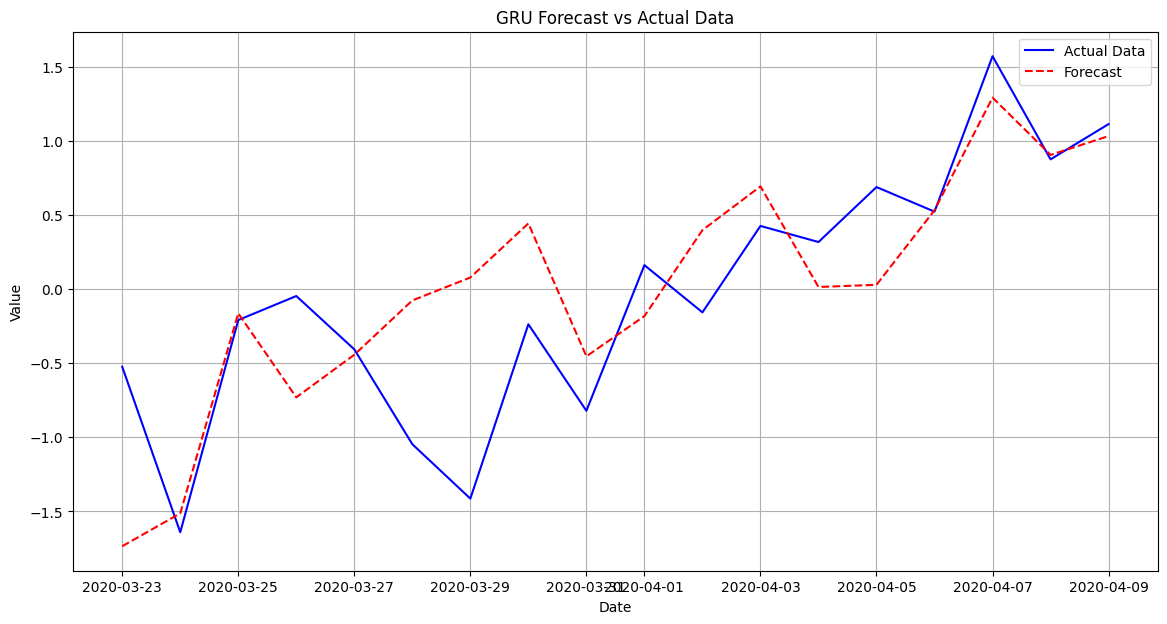

In [10]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, color='blue', label='Actual Data')
plt.plot(df.index[-len(y_test):], y_pred, color='red', linestyle='--', label='Forecast')
plt.title('GRU Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Conclusion

In this example, we implemented a Gated Recurrent Unit (GRU) network for time series forecasting. GRUs, as a type of Recurrent Neural Network (RNN), are particularly effective for handling sequential data due to their ability to capture long-term dependencies and mitigate the vanishing gradient problem. By using a GRU model, we aimed to improve forecasting accuracy compared to simpler models.

**Key Takeaways:**

- **Model Construction:** The GRU model was built using the Keras Sequential API with an `Input` layer to define the shape of the input data. This approach adheres to best practices and avoids common warnings.
- **Training and Evaluation:** The model was trained on a scaled version of the time series data and evaluated using mean squared error (MSE) to assess its performance. The forecasted values were then compared against actual values.
- **Forecasting Performance:** The final plot illustrated how well the GRU model's forecasts matched the actual data, providing visual insight into the model's effectiveness.

Overall, GRUs offer a robust framework for time series forecasting, capturing temporal dependencies with fewer parameters than traditional RNNs, and can be a valuable tool in scenarios requiring the modeling of complex sequential patterns.
